In [1]:
import numpy as np
import rebound as rb
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pyplot import figure,show,subplots,savefig
import time

In [2]:
"""
This is where the solar system is set up using data from the horizons module.
The data is taken as of the data 2000-06-30 15:24. 
"""
sim = rb.Simulation()
sim.units = ('AU','yr','Msun')
solarSystem = ["Sun","Jupiter","Earth","Mercury","Venus","Mars","Uranus","Neptune","Saturn"]
date = "2000-06-30 15:24" 
sim.add(solarSystem,date=date)

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Target body name: Jupiter Barycenter (5).
Searching NASA Horizons for 'Earth'... Found: Target body name: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for 'Mars'... Found: Target body name: Mars Barycenter (4).
Searching NASA Horizons for 'Uranus'... Found: Target body name: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Target body name: Neptune Barycenter (8).
Searching NASA Horizons for 'Saturn'... Found: Target body name: Saturn Barycenter (6).


In [3]:
"""
Some settings like moving the center of mass to the the star (sun) and integrator to whfast and then saving
the system to a file so that we do not have to load the system every time in horizons which takes a while
"""
sim.move_to_com()
sim.integrator = "whfast"
sim.save("solarSystemStart.bin")

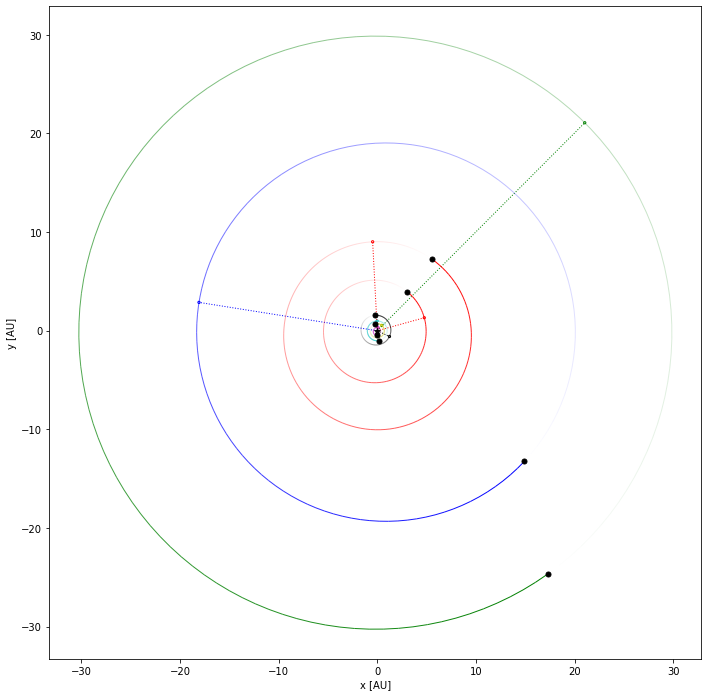

In [4]:
"""
Loading the previously saved system. Plus plotting the current orbit to check if it there is nothing weird.
"""
simsol = rb.Simulation("solarSystemStart.bin")
os = simsol.calculate_orbits()

simsol.dt = 0.05*os[3].P #mercury orbit
fig = rb.OrbitPlot(simsol,unitlabel="[AU]",color=True,periastron=True,figsize=(12,12))

In [5]:
"""
Here the system is integrated over a period of 15 years. Certain properties are saved for every planet.
Like position, semi major axis, eccentricity, longitude and inclination. Energy is saved for the whole system.
The time it takes to do the integration is also printed out.
"""
startTime = time.time()
from IPython.display import display,clear_output
endTime = 15
Nplanets = 8
Nsteps = 100
times = np.linspace(0,endTime,Nsteps)
ps = simsol.particles

major = np.zeros((Nplanets,Nsteps))
ecc = np.zeros((Nplanets,Nsteps))
incl = np.zeros((Nplanets,Nsteps))
E = np.zeros(Nsteps)
for i,t in enumerate(times):
    simsol.integrate(t)
    os = simsol.calculate_orbits()
    for j in range(Nplanets):
        major[j][i] = os[j].a
        ecc[j][i] = os[j].e
        incl[j][i] = os[j].inc
    E[i] = simsol.calculate_energy()
    fig,ax = rb.OrbitPlot(simsol,color=True,unitlabel="[AU]",figsize=(12,12))
    display(fig)
    plt.close(fig)
    clear_output(wait=True)
    
endTime = time.time()
print("time:" , endTime-startTime)

time: 30.027628898620605


In [6]:
"""
Here the values from the integration are saved to a file for the orbitals and the energy of the system. The
simulation is also saved again so that the end system is also saved so the integration does not haveto be
redone.
"""
orbitals = (major,ecc,incl)
with open("orbitals_data_solarysystem.dat","w") as fd_out:
    for i in range(len(times)):
        for j in range(len(orbitals)):
            for k in range(Nplanets-1):
                fd_out.write(str(orbitals[j][k][i])+"\t")
            fd_out.write(str(orbitals[j][Nplanets-1][i])+"\n")
fd_out.close()

with open("energy_data_solarsystem.dat","w") as fd_out:
    for i in range(len(E)):
        fd_out.write(str(E[i])+"\n")


simsol.save("solarSystemEnd.bin")

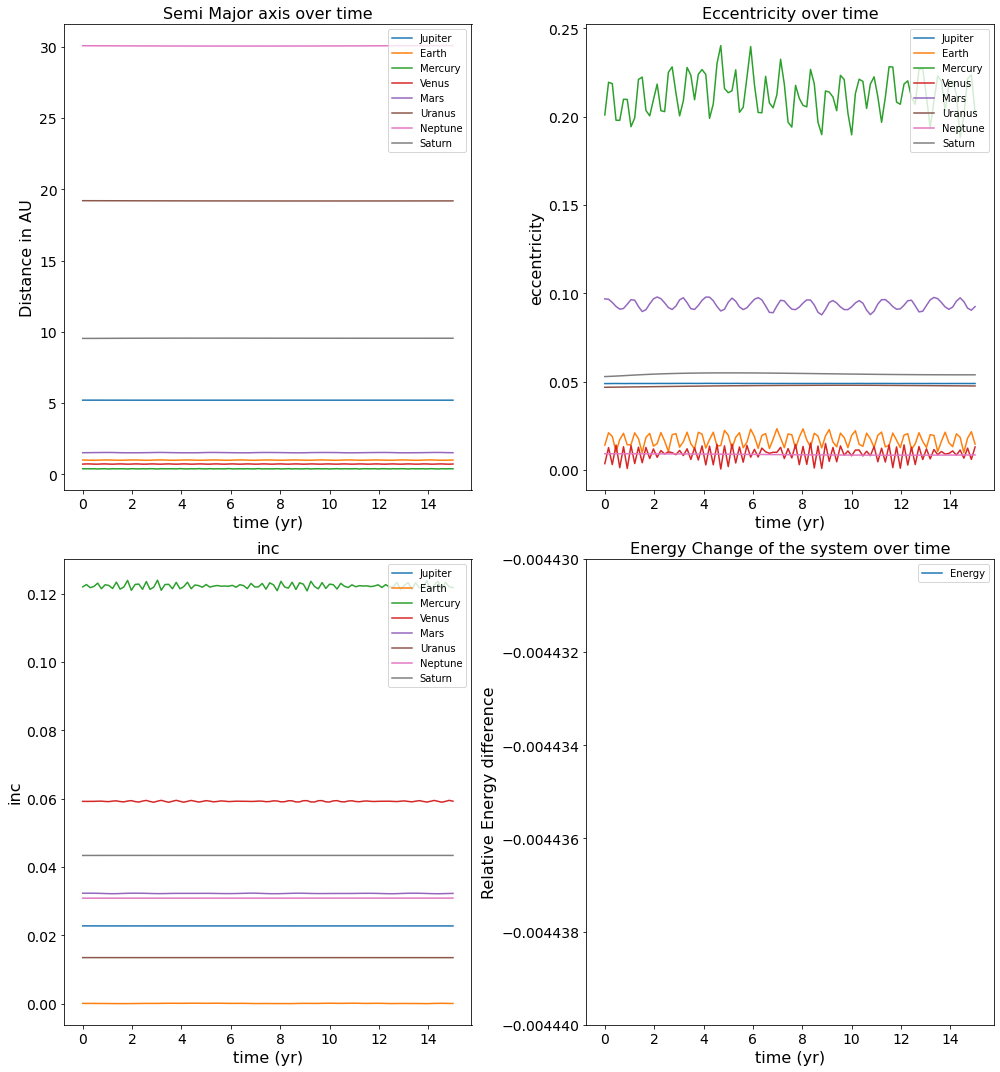

In [9]:
"""
Here all the orbitals and energy values are plotted
"""

data = np.loadtxt("orbitals_data_solarysystem.dat")
E = np.loadtxt("energy_data_solarsystem.dat")
endTime = 15
Nplanets = 8
Nsteps = 100
times = np.linspace(0,endTime,Nsteps)
major = np.zeros((Nplanets,Nsteps))
ecc = np.zeros((Nplanets,Nsteps))
incl = np.zeros((Nplanets,Nsteps))
Norbitals = 3
for j in range(Nplanets):
    major[j] = data[0::Norbitals,j]
    ecc[j] = data[1::Norbitals,j]
    incl[j] = data[2::Norbitals,j]
parameters = {'xtick.labelsize': 14,'ytick.labelsize': 14}
plt.rcParams.update(parameters)
fig,frames = subplots(2,2,figsize=(14,15))
frames = frames.flat
titles=["Semi Major axis over time","Eccentricity over time","inc","Energy Change of the system over time"]
solarSystem = ["Jupiter","Earth","Mercury","Venus","Mars","Uranus","Neptune","Saturn"]
yaxes = ["Distance in AU","eccentricity","inc","Relative Energy difference"]
orbitals = (major,ecc,incl)
for i,title,frame in zip(range(len(titles)),titles,frames):
    if (i!=len(titles)-1):
        for j in range(Nplanets):
            frame.plot(times,orbitals[i][j],label=solarSystem[j])
    else:
        frame.plot(times,np.abs(E-E[0])/E[0],label="Energy")
        frame.set_ylim(-0.00444,-0.00443)
    fsize=16
    frame.set_title(title,fontsize=fsize)
    frame.set_ylabel(yaxes[i],fontsize=fsize)
    frame.legend()
    frame.set_xlabel("time (yr)",fontsize=fsize)
    

fig.tight_layout()

In [11]:
"""
Here the system is loaded in from the horizon data in the year 2015
"""
simComp = rb.Simulation()
simComp.units = ('AU','yr','Msun')
solarSystem = ["Sun","Jupiter","Earth","Mercury","Venus","Mars","Uranus","Neptune","Saturn"]
date2 = "2015-06-30 15:24" 
simComp.add(solarSystem,date=date2)

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Target body name: Jupiter Barycenter (5).
Searching NASA Horizons for 'Earth'... Found: Target body name: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for 'Mars'... Found: Target body name: Mars Barycenter (4).
Searching NASA Horizons for 'Uranus'... Found: Target body name: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Target body name: Neptune Barycenter (8).
Searching NASA Horizons for 'Saturn'... Found: Target body name: Saturn Barycenter (6).


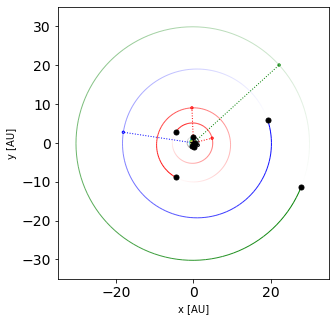

In [22]:
"""Here the plots of the orbit are made for the calculated data and the observed data """
#observedframe1 = rb.OrbitPlot(simComp,unitlabel="[AU]",color=True,periastron=True,xlim=[-35,35],ylim=[-35,35])

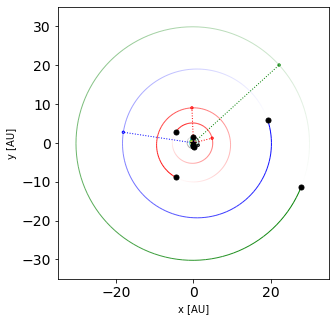

In [23]:
#calculated
frame2 = rb.OrbitPlot(simsol,unitlabel="[AU]",color=True,periastron=True,xlim=[-35,35],ylim=[-35,35])